# Digit Recognition using Tensorflow 

## Importing Libraries

- `numpy` - core library for scientific computing in python.
- `matplotlib` - plotting library.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- `Tensorflow` - framework for machine learning and high performance numerical computation.

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

### Importing the mnist dataset into Training set and Test set

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

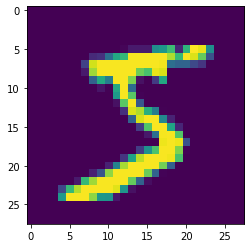

In [6]:
plt.imshow(X_train[0])

### One-hot encoding output vectors

In [7]:
y_train.shape

(60000,)

In [8]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [9]:
y_train_cat.shape

(60000, 10)

### Normalizing the inputs

In [10]:
X_train = X_train/255
X_test = X_test/255

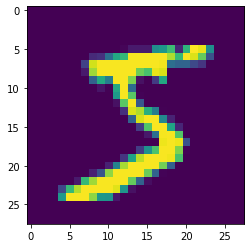

In [11]:
plt.imshow(X_train[0])

### Reshaping the inputs to add the color channel

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [14]:
X_train.shape

(60000, 28, 28, 1)

### Creating our convolutional model
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_6 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
```

- `Conv2D` - Convolutional Layer.
- `MaxPool2D` - Pooling layer.
- `Flatten` - Flattening our outouts from 12 x 12 x 32 into 4608.
- `Dense` - Dense Hidden layer.

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

### Compling our model
- `Adam` - Optimizer for our model
    - other optimizers (RMSprop, momentum,.. )
- `categorical_crossentropy` - loss for our model since we have 10 classes.
- `metrics` - metrics for our model.

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Fitting our model

In [19]:
model.fit(X_train,y_train_cat, epochs=10, validation_data=(X_test,y_test_cat), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1425 - accuracy: 0.9571 - val_loss: 0.0487 - val_accuracy: 0.9841
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0459 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0441 - val_accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0416 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0457 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0453 - val_accuracy: 0.9870


In [22]:
losses = pd.DataFrame(model.history.history)

In [23]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.142515,0.957117,0.048693,0.9841
1,0.048436,0.985117,0.045931,0.9843
2,0.030732,0.990133,0.044058,0.9860
3,0.021297,0.993383,0.041607,0.9873
4,0.015120,0.994883,0.045725,0.9866
5,0.011941,0.996217,0.045282,0.9870


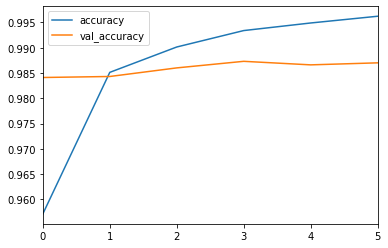

In [24]:
losses[['accuracy','val_accuracy']].plot()

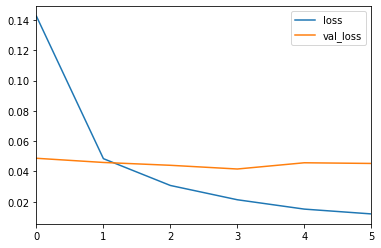

In [25]:
losses[['loss','val_loss']].plot()

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.evaluate(X_test,y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.0453 - accuracy: 0.9870


[0.04528200253844261, 0.9869999885559082]

In [29]:
predictions = np.argmax(model.predict(X_test), axis=-1)

Model predicted 7


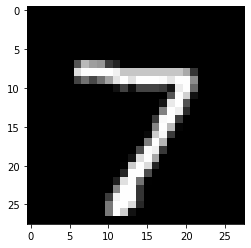

In [41]:
plt.imshow(X_test[0].reshape(28,28),cmap='gray')
print("Model predicted " + str(predictions[0]))

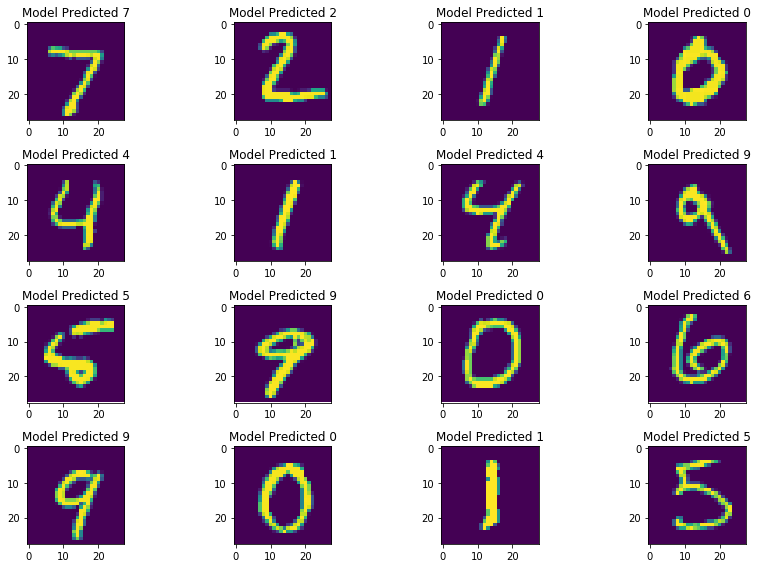

In [73]:
axes=[]
fig=plt.figure(figsize=(12,8))
for a in range(4*4):
    axes.append(fig.add_subplot(4, 4, a+1) )
    subplot_title=("Model Predicted "+str(predictions[a]))
    axes[-1].set_title(subplot_title)  
    plt.imshow(X_test[a].reshape(28,28))
fig.tight_layout()    
plt.show()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [34]:
print(confusion_matrix(y_test,predictions))

[[ 975    0    3    1    0    1    0    0    0    0]
 [   0 1127    2    1    0    1    2    1    1    0]
 [   0    1 1023    1    1    0    2    4    0    0]
 [   1    0    2  997    0    8    0    0    2    0]
 [   0    0    0    0  978    0    2    0    0    2]
 [   2    0    0    4    0  884    2    0    0    0]
 [   5    2    0    0    4    4  942    0    1    0]
 [   0    0    6    0    0    0    0 1018    1    3]
 [   6    1    3    2    0    3    2    3  949    5]
 [   2    0    0    3    8    9    0    9    1  977]]
